In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import données

In [2]:
df = pd.read_csv('champs-elysees.csv', sep=';', index_col='Date et heure de comptage')
df.head()

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
Date et heure de comptage,,,,,,,,,,,,,,
2020-11-02T05:00:00+01:00,4264,AV_Champs_Elysees,144.0,2.25611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01T23:00:00+01:00,4264,AV_Champs_Elysees,245.0,8.11222,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-07-01T16:00:00+02:00,4264,AV_Champs_Elysees,1138.0,17.86611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-07-01T22:00:00+02:00,4264,AV_Champs_Elysees,880.0,16.03611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-08-05T03:00:00+02:00,4264,AV_Champs_Elysees,487.0,6.35389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


# Création de DF pour débit et taux d'occupation

<AxesSubplot:xlabel='date'>

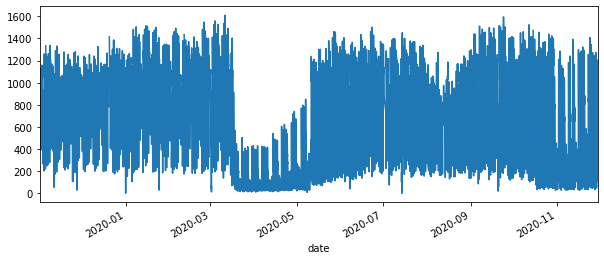

In [3]:
data= pd.DataFrame()
data['debit'] = df['Débit horaire']
data['taux'] = df["Taux d'occupation"]
data['date'] = pd.to_datetime(df.index)
data = data.set_index(data.date)
data.debit.plot(figsize=(10,4))

In [4]:
data.debit.isna().sum()

77

# Filling missing values with rolling mean, window = 3h

In [5]:
def fill_with_AR(df, column):
    '''Fills missing values in column with rolling mean. Creates column "filled_debit" or "filled_taux"'''
    y = df[column].rolling(10, center=True,min_periods=1).mean()
    if column == 'debit':
        name = column
    else:
        name = 'taux'
    df['filled_'+name] = y
    df['filled_'+name].update(df[column])

fill_with_AR(data, 'debit')
fill_with_AR(data, 'taux')

In [6]:
data.head()

,debit,taux,date,filled_debit,filled_taux
date,,,,,
2020-11-02 05:00:00+01:00,144.0,2.25611,2020-11-02 05:00:00+01:00,144.0,2.25611
2020-11-01 23:00:00+01:00,245.0,8.11222,2020-11-01 23:00:00+01:00,245.0,8.11222
2020-07-01 16:00:00+02:00,1138.0,17.86611,2020-07-01 16:00:00+02:00,1138.0,17.86611
2020-07-01 22:00:00+02:00,880.0,16.03611,2020-07-01 22:00:00+02:00,880.0,16.03611
2020-08-05 03:00:00+02:00,487.0,6.35389,2020-08-05 03:00:00+02:00,487.0,6.35389


# Debit horaire et moyenne mobile, fenêtre = 24h

In [13]:
y = data.filled_debit.rolling(24, center=True).mean()
# data['debit'].rolling(3).mean()

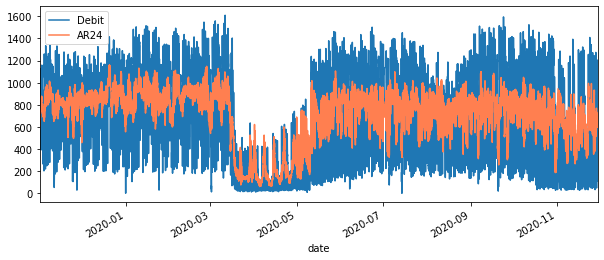

In [17]:
data.filled_debit.plot(figsize=(10,4), label = 'Debit')
y.plot(figsize=(10,4), color='coral', label = 'AR24')
plt.legend()
plt.show()

# Taux d'occupation et moyenne mobile, fenêtre = 24h

In [23]:
z = data.filled_taux.rolling(24, center=True).mean()

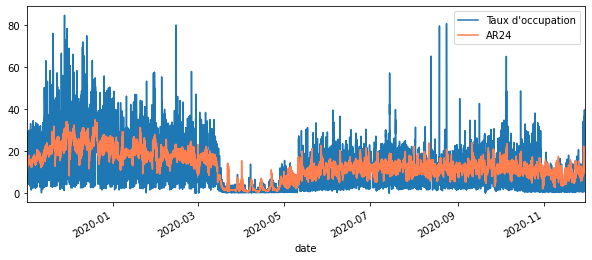

In [24]:
data.filled_taux.plot(figsize=(10,4), label = "Taux d'occupation")
z.plot(figsize=(10,4), color='coral', label = 'AR24')
plt.legend()
plt.show()

# Tests avec modèles ARIMA 

In [30]:
from statsmodels.tsa.arima.model import ARIMA


(9428, 1)

## 1. Decomposition débit

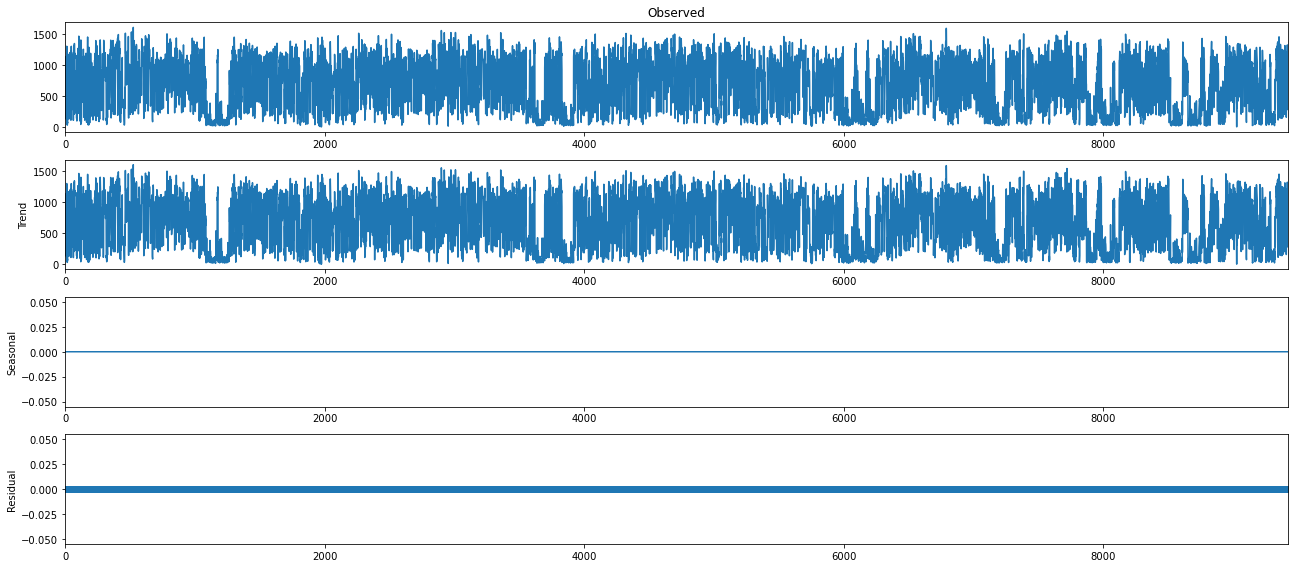

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pylab import rcParams
# data.index = data.date
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data.filled_debit.to_numpy().reshape(len(data.filled_debit),1), model='additive', period=1)
fig = decomposition.plot()
plt.show()